In [1]:
import os
import numpy as np
import pandas as pd
import glob
from metricas.compute_perf import (
    evaluate_predictions,
    evaluate_multiple_pred_folders,
    find_best_conf_threshold_and_plot,
)

In [2]:
ds_name = "DS-71c1fd51-v2"
IMG_FOLDER = f"Data/{ds_name}/images/val"
gt_folder = f"Data/{ds_name}/labels/val"

In [3]:
imgs = glob.glob(f"{IMG_FOLDER}/*")
imgs.sort()
len(imgs)

1699

In [4]:
pred_folders = glob.glob(f"Data/test_preds/**/labels")
pred_folders.sort()
pred_folders = [f for f in pred_folders if f"{ds_name}" in f]
len(pred_folders)

6

In [5]:
# Define a range of possible confidence threshold values
conf_thres_range = np.linspace(0.01, 0.50, 50)

In [6]:
results_df = evaluate_multiple_pred_folders(pred_folders, gt_folder, conf_thres_range)
results_df = results_df.sort_values(by="Best F1 Score", ascending=False)
results_df

,Prediction Folder,Best Threshold,Best F1 Score,Precision,Recall
1,DS-71c1fd51-v2_yolov8s_exp_10,0.11,0.870192,0.913482,0.830820
2,DS-71c1fd51-v2_yolov8s_exp_26,0.11,0.870192,0.913482,0.830820
4,DS-71c1fd51-v2_yolov8s_exp_91,0.08,0.866089,0.882553,0.850229
3,DS-71c1fd51-v2_yolov8s_exp_76,0.08,0.866089,0.882553,0.850229
5,DS-71c1fd51-v2_yolov8s_exp_92,0.08,0.866089,0.882553,0.850229
0,DS-71c1fd51-v2_legendary-field-19,0.09,0.813878,0.805520,0.822412


In [7]:
folder_name = results_df["Prediction Folder"].values[0]
pred_folder = f"Data/test_preds/{folder_name}/labels"
print(folder_name)

DS-71c1fd51-v2_yolov8s_exp_10


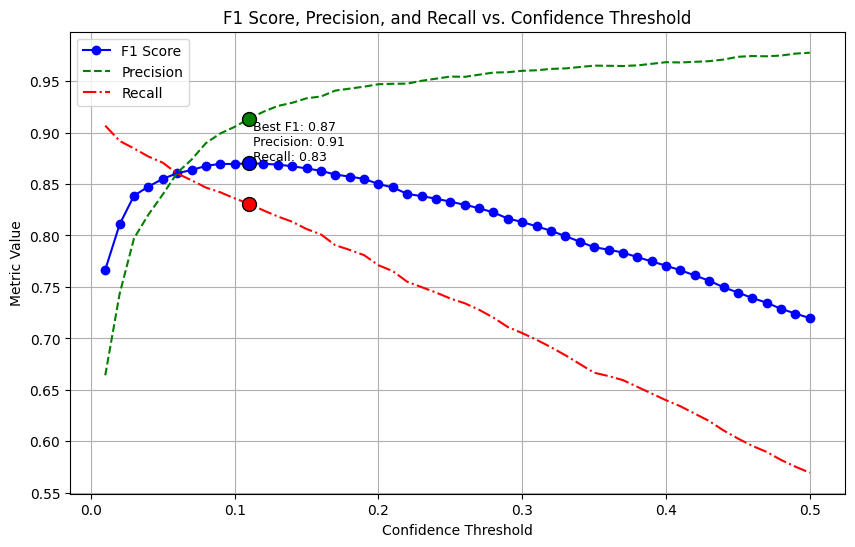

Best Confidence Threshold: 0.11
Best F1 Score: 0.8701923076923076
Precision: 0.9134823359769286
Recall: 0.8308196721311475


In [8]:
# Example usage
best_conf_thres, best_f1_score, best_precision, best_recall = (
    find_best_conf_threshold_and_plot(pred_folder, gt_folder, conf_thres_range, True)
)
print(
    f"Best Confidence Threshold: {best_conf_thres}\nBest F1 Score: {best_f1_score}\nPrecision: {best_precision}\nRecall: {best_recall}"
)

In [9]:
# Evaluate by category

# Get all unique filenames across both folders
gt_filenames = [
    os.path.splitext(os.path.basename(f))[0]
    for f in glob.glob(os.path.join(gt_folder, "*.txt"))
]
pred_filenames = [
    os.path.splitext(os.path.basename(f))[0]
    for f in glob.glob(os.path.join(pred_folder, "*.txt"))
]
all_filenames = set(gt_filenames + pred_filenames)
cat_names = [filename.split("_")[0].lower() for filename in all_filenames]
cat_names = list(set(cat_names))

In [10]:
f1_scores, precisions, recalls = [], [], []
results_df_by_cat = pd.DataFrame()
for cat_name in cat_names:
    results = evaluate_predictions(pred_folder, gt_folder, best_conf_thres, cat_name)
    f1_scores.append(results["f1_score"])
    precisions.append(results["precision"])
    recalls.append(results["recall"])

results_df_by_cat["cat"] = cat_names
results_df_by_cat["F1"] = f1_scores
results_df_by_cat["precision"] = precisions
results_df_by_cat["recall"] = recalls
results_df_by_cat = results_df_by_cat.sort_values(by="F1", ascending=False)
results_df_by_cat

,cat,F1,precision,recall
0,synthetic,0.987212,0.984694,0.989744
6,vid,0.952191,0.948413,0.956000
7,adf,0.937500,1.000000,0.882353
1,random,0.929134,0.936508,0.921875
2,fuego,0.842730,0.855422,0.830409
4,pyronear,0.842424,0.896774,0.794286
3,aiformankind,0.808389,0.915767,0.723549
5,awf,0.732143,0.661290,0.820000
